In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/data science/Salary.csv')
df.head(10)

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891
5,2.9,56642
6,3.0,60150
7,3.2,54445
8,3.2,64445
9,3.7,57189


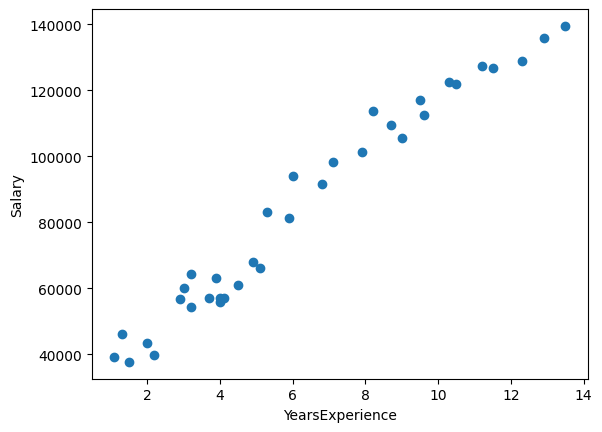

In [ ]:
plt.scatter(df.YearsExperience,df['Salary'])
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.show()

In [94]:
x=KMeans(n_clusters=3)

In [95]:
y_predicted=x.fit_predict(df[['YearsExperience','Salary']])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [96]:

y_predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

In [97]:
df['cluster']=y_predicted
df.head()

,YearsExperience,Salary,cluster
0,0.000000,0.015845,0
1,0.016129,0.083296,0
2,0.032258,0.000000,0
3,0.072581,0.056952,0
4,0.088710,0.021232,0


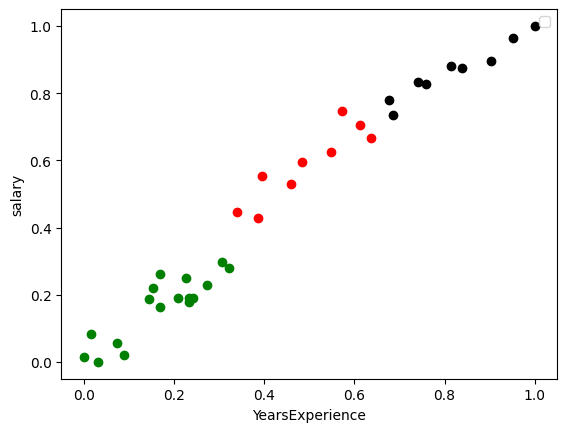

In [98]:
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]

plt.scatter(df1.YearsExperience,df1['Salary'],color='green')
plt.scatter(df2.YearsExperience,df2['Salary'],color='red')
plt.scatter(df3.YearsExperience,df3['Salary'],color='black')

plt.xlabel('YearsExperience')
plt.ylabel('salary')
plt.legend()
plt.show()

In [101]:
sc=MinMaxScaler()
sc.fit(df[['Salary']])
df['Salary']=sc.transform(df[['Salary']])

sc.fit(df[['YearsExperience']])
df['YearsExperience']=sc.transform(df[['YearsExperience']])

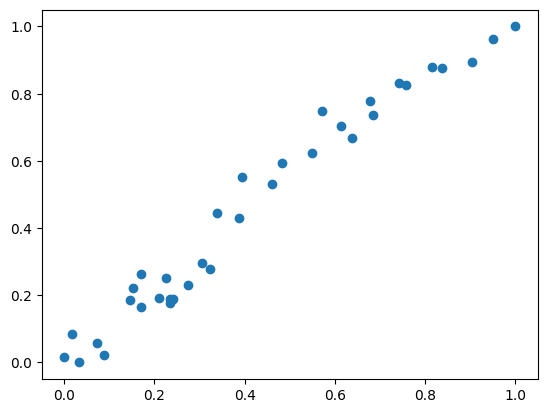

In [102]:
plt.scatter(df.YearsExperience,df['Salary'])
plt.show()

In [103]:
x.cluster_centers_

array([[0.17030361, 0.1655222 ],
       [0.49283154, 0.58862655],
       [0.81899642, 0.86532198]])

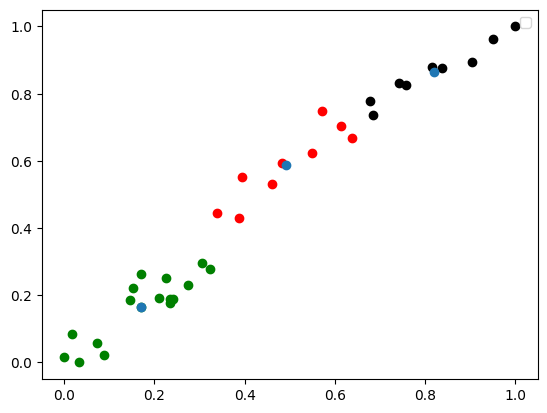

In [104]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.YearsExperience,df1['Salary'],color='green')
plt.scatter(df2.YearsExperience,df2['Salary'],color='red')
plt.scatter(df3.YearsExperience,df3['Salary'],color='black')
plt.scatter(x.cluster_centers_[:,0],x.cluster_centers_[:,1])
plt.legend()
plt.show()

In [90]:
se=[]
k_rng=range(1,10)
for k in k_rng:
  km=KMeans(n_clusters=k)
  km.fit(df[['YearsExperience','Salary']])
  se.append(km.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

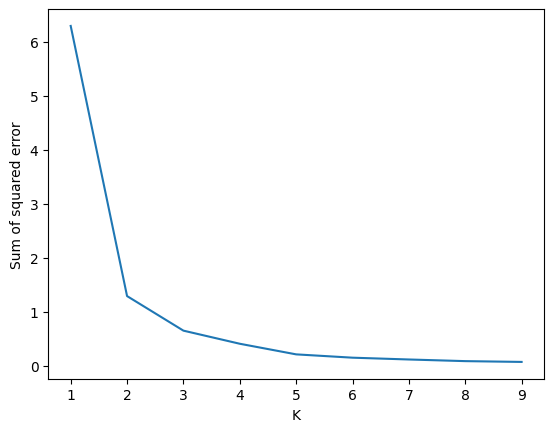

In [79]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,se)
plt.show()